# Modelo 3

### modelo de IA para prever série temporal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
df['date'] = pd.to_datetime(df['date'])#, format='%d.%m.%Y %H:%M:%S')
df = df.set_index('date')

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

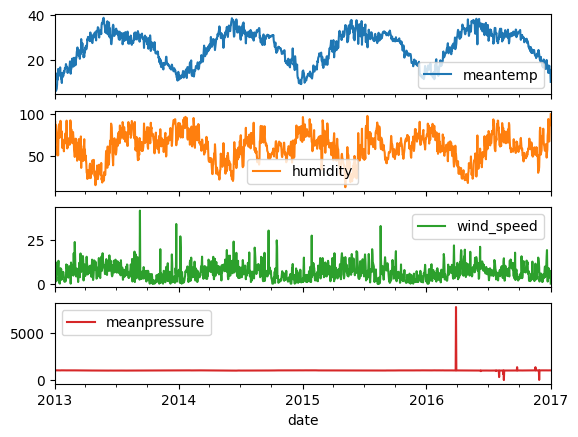

In [4]:
df.plot(subplots=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x202b70ea300>,
 'caps': [<matplotlib.lines.Line2D at 0x202b70ea450>,
 'boxes': [<matplotlib.lines.Line2D at 0x202b70ea030>],
 'medians': [<matplotlib.lines.Line2D at 0x202b70eaa20>],
 'fliers': [],
 'means': []}

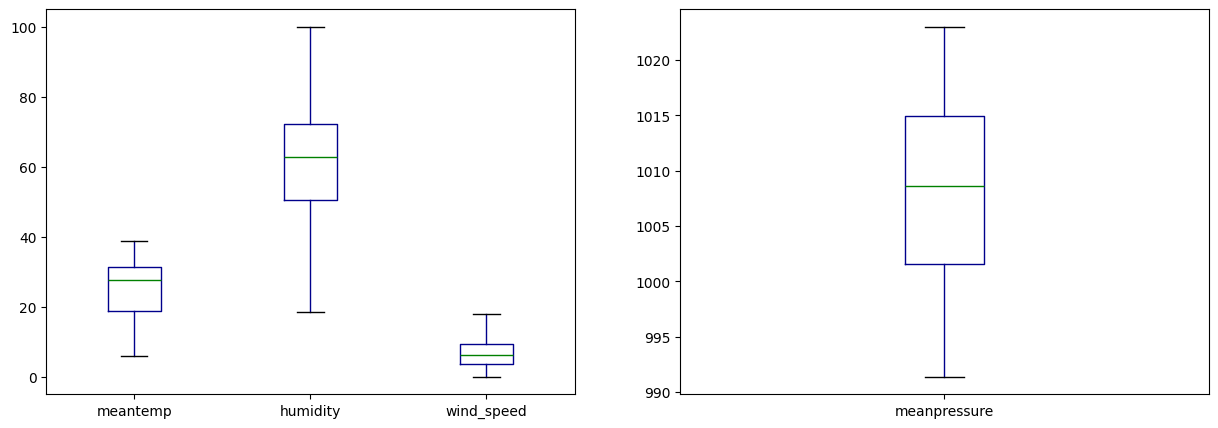

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
cl1 = df[list(df.columns)[:-1]]
cl2 = df[list(df.columns)[-1:]]
#plt.boxplot(cl1,)
ax1.boxplot(cl1,
    boxprops=dict(color='darkblue'),
    capprops=dict(color='black'),
    whiskerprops=dict(color='darkblue'),
    flierprops=dict(color='cyan', markeredgecolor='yellow'),
    medianprops=dict(color='green'),
labels=cl1.columns,showfliers=False)

ax2.boxplot(cl2,
    boxprops=dict(color='darkblue'),
    capprops=dict(color='black'),
    whiskerprops=dict(color='darkblue'),
    flierprops=dict(color='cyan', markeredgecolor='yellow'),
    medianprops=dict(color='green'),
labels=cl2.columns,showfliers=False)
#ax1.boxplot(df[list(df.columns)[:-1]],showfliers=False)
#ax2.boxplot(df[list(df.columns)[-1]],showfliers=False)

#df[list(df.columns)[:-1]].boxplot(showfliers=False)

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

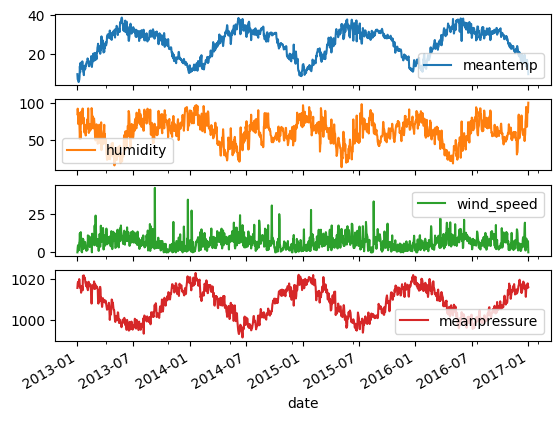

In [6]:
Q1 = df['meanpressure'].quantile(0.25)
Q3 = df['meanpressure'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['meanpressure'] >= Q1 - 1.5 * IQR) & (df['meanpressure'] <= Q3 + 1.5 *IQR)
sml1 = df.loc[filter]
sml1.plot(subplots=True)


In [7]:
cl1 = np.abs(stats.zscore(df.meanpressure))
cl1

date
2013-01-01    0.025321
2013-01-02    0.037162
2013-01-03    0.041972
2013-01-04    0.033647
2013-01-05    0.029946
                ...   
2016-12-28    0.024758
2016-12-29    0.032193
2016-12-30    0.037743
2016-12-31    0.027726
2017-01-01    0.027171
Name: meanpressure, Length: 1462, dtype: float64

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

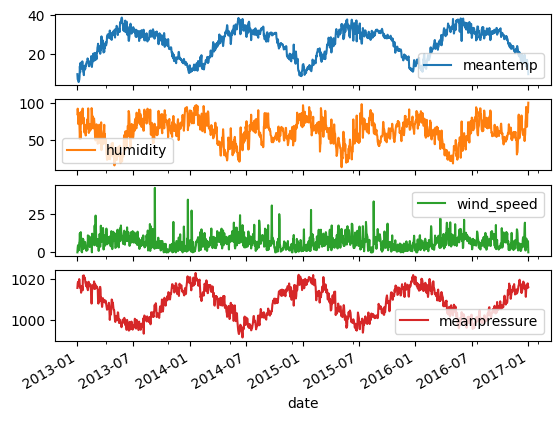

In [8]:
sml2 = df[
    #(np.abs(stats.zscore(df)) < 3).all(axis=1)
    (np.abs(stats.zscore(df.meanpressure)) < 0.359)
]
sml2.plot(subplots=True)

In [13]:
diff_size1 = pd.concat([sml1,sml2]).drop_duplicates(keep=False)
if diff_size1.__len__() == 0:
    print("nenhuma diferença no corte dos outliers em meantemperature")
else:
    print(diff_size1)

nenhuma diferença no corte dos outliers em meantemperature
